# Pyber

In [19]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
city_path = 'city_data.csv'
ride_path = 'ride_data.csv'

city = pd.read_csv(city_path)
ride = pd.read_csv(ride_path)

In [21]:
city.head(3)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban


In [22]:
ride.head(3)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587


Calculate the Metrics:

Average Fare ($) Per City

Per City Total Number of Rides Per City 

Total Number of Drivers Per City 

City Type (Urban, Suburban, Rural)

In [27]:
#Calculate Average Fare Per City

#groupby city
ride_by_city = ride.groupby(ride['city'])

#we need to add index at the end of calculation to be able to merge later on, otherwise the indexes won't match
averagefare_per_city = ride_by_city.mean().reset_index()

#print out the average per city
averagefare_per_city.head()


,city,fare,ride_id
0,Alvarezhaven,23.928710,5.351586e+12
1,Alyssaberg,20.609615,3.536678e+12
2,Anitamouth,37.315556,4.195870e+12
3,Antoniomouth,23.625000,5.086800e+12
4,Aprilchester,21.981579,4.574788e+12


In [74]:
#Per City Total Number of Rides Per City

number_of_rides_per_city = ride_by_city.count().reset_index()

#averagefare_per_city = averagefare_per_city.assign(number_of_rides_per_city=number_of_rides_per_city.values)
number_of_rides_per_city.head()

#print(ride_by_city)

,city,date,fare,ride_id
0,Alvarezhaven,31,31,31
1,Alyssaberg,26,26,26
2,Anitamouth,9,9,9
3,Antoniomouth,22,22,22
4,Aprilchester,19,19,19


In [71]:
#Total Number of Drivers Per City

#Because driver count is in the city dataframe we need to merge the two dataframes

#merge the two dataframes
merge1 = pd.merge(city, averagefare_per_city, on='city', how='outer')

#print out the new dataframe we see that we have driver_count and city type(urban,suburban,rural)
merge1.head()




,city,driver_count,type,fare,ride_id
0,Kelseyland,63,Urban,21.806429,4.506717e+12
1,Nguyenbury,8,Urban,25.899615,4.138011e+12
2,East Douglas,12,Urban,26.169091,4.732315e+12
3,West Dawnfurt,34,Urban,22.330345,5.119541e+12
4,Rodriguezburgh,52,Urban,21.332609,5.703310e+12


In [72]:
#merge the two dataframes
merge2 = pd.merge(merge1, number_of_rides_per_city, on='city', how='outer')

#print out the new dataframe we see that we have driver_count and city type(urban,suburban,rural)
merge2.head()



,city,driver_count,type,fare_x,ride_id_x,date,fare_y,ride_id_y
0,Kelseyland,63,Urban,21.806429,4.506717e+12,28,28,28
1,Nguyenbury,8,Urban,25.899615,4.138011e+12,26,26,26
2,East Douglas,12,Urban,26.169091,4.732315e+12,22,22,22
3,West Dawnfurt,34,Urban,22.330345,5.119541e+12,29,29,29
4,Rodriguezburgh,52,Urban,21.332609,5.703310e+12,23,23,23


In [130]:
#rename the columns in the merged dataset

merge2newname = merge2.rename(columns={'fare_x':'average_fare',
                                       'fare_y':'number_of_rides'})

merge2neworder = merge2newname[['city','average_fare','number_of_rides','driver_count','type']]

merge2neworder.head(10)

,city,average_fare,number_of_rides,driver_count,type
0,Kelseyland,21.806429,28,63,Urban
1,Nguyenbury,25.899615,26,8,Urban
2,East Douglas,26.169091,22,12,Urban
3,West Dawnfurt,22.330345,29,34,Urban
4,Rodriguezburgh,21.332609,23,52,Urban
5,South Josephville,26.823750,24,4,Urban
6,West Sydneyhaven,22.368333,18,70,Urban
7,Travisville,27.220870,23,37,Urban
8,Torresshire,24.207308,26,70,Urban
9,Lisaville,28.428929,28,66,Urban


# Bubble Plot of Ride Sharing Data

Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

In [55]:
import seaborn as sns
import scipy as sp

In [129]:
city_urban.head(10)

,city,average_fare,number_of_rides,driver_count,type
0,Kelseyland,21.806429,28,63,Urban
1,Nguyenbury,25.899615,26,8,Urban
2,East Douglas,26.169091,22,12,Urban
3,West Dawnfurt,22.330345,29,34,Urban
4,Rodriguezburgh,21.332609,23,52,Urban
5,South Josephville,26.823750,24,4,Urban
6,West Sydneyhaven,22.368333,18,70,Urban
7,Travisville,27.220870,23,37,Urban
8,Torresshire,24.207308,26,70,Urban
9,Lisaville,28.428929,28,66,Urban


/Users/aishwaryadesai/anaconda3/envs/PythonData1/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


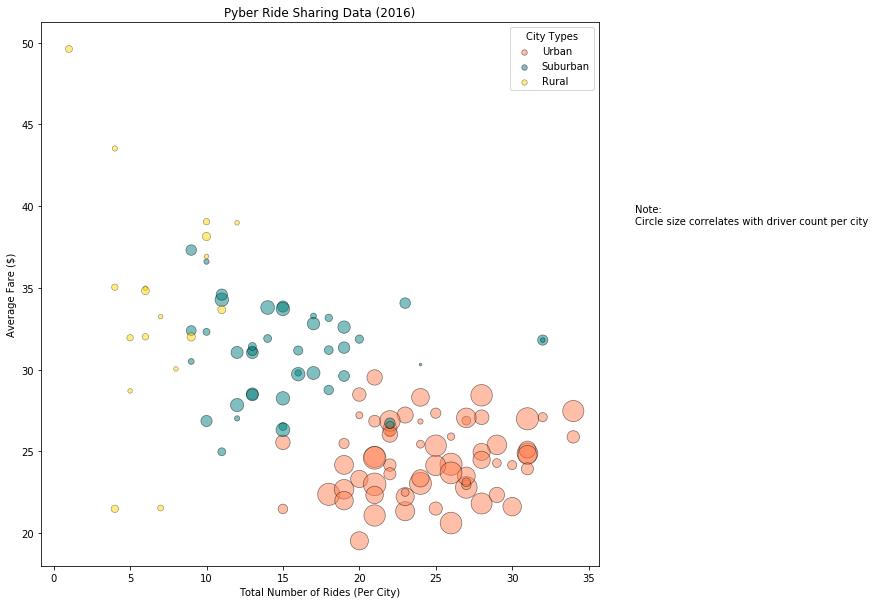

In [154]:
#to change the colors by type we need to first create three separate bubble charts and then graph them on the same graph


#since the colors are determined by city type we need to create three datasets for each type

#data set for urban
city_urban = merge2neworder.loc[merge2neworder['type'] == 'Urban']

#data set for suburban cities
city_suburban = merge2neworder.loc[merge2neworder['type'] == 'Suburban']

#data set for rural cities
city_rural = merge2neworder.loc[merge2neworder['type'] == 'Rural']



#three bubble plots
fig = plt.figure(figsize=(10,10))
x = fig.add_subplot(111)
y = fig.add_subplot(111)
z = fig.add_subplot(111)


#create plots from the data sets defined above
x.scatter(city_urban['number_of_rides'], city_urban['average_fare'], 
                        (city_urban['driver_count']*7),facecolors='coral', edgecolors='black', alpha=0.5,
                        label='Urban',linewidth=.7)
y.scatter(city_suburban['number_of_rides'], city_suburban['average_fare'], 
                        (city_suburban['driver_count']*7),facecolors='teal', edgecolors='black', alpha=0.5,
                        label='Suburban',linewidth=.7)
z.scatter(city_rural['number_of_rides'],city_rural['average_fare'], 
                        (city_rural['driver_count']*7),facecolors='gold', edgecolors='black', alpha=0.5,
                        label='Rural',linewidth=.5)


#add the labels and the notes

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.figtext(.95, .60, textstr)
lgnd = plt.legend(loc='best', title = 'City Types')
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
textstr = 'Note:\nCircle size correlates with driver count per city'


#print the plot
plt.show()
    
    
    

# Pie Charts

In addition, you will be expected to produce the following three pie charts:

% of Total Fares by City Type 

% of Total Rides by City Type 

% of Total Drivers by City Type



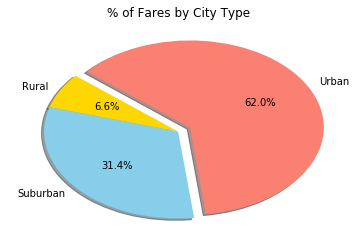

In [194]:
#first define the colors that we will use
colors = ['gold', 'skyblue', 'salmon']


#merge the city and ride datasets
city_ride = pd.merge(city, ride, on='city', how='outer')

#group by type
total_fares_bytype = city_ride.groupby(city_ride['type']).sum().reset_index()

#define labels
labels = total_fares_bytype['type']

#use total fares as our pie slice
area_total_fares = total_fares_bytype['fare']

#explode urban out
explode = (0, 0, 0.1)

#build pie chart title
plt.title('% of Fares by City Type')
#build our pie chart
plt.pie(area_total_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

# Second Pie Chart

% of Total Rides by City Type

In [195]:
# calculate the total number of rides per city type

nbr_rides_per_city = number_of_rides_per_city[['city', 'ride_id']].copy()

# merge the data on city
rides_by_city_type_merged = pd.merge(city_types, nbr_rides_per_city, on='city', how='left')

#rename ride_id
total_rides_by_city_type_merged = rides_by_city_type_merged.rename(columns = {"ride_id": "nbr_rides"})

# group by city type and sum up the rides
total_rides_by_city_type = total_rides_by_city_type_merged.groupby(total_rides_by_city_type_merged['type']).sum().reset_index()
total_rides_by_city_type



,type,nbr_rides
0,Rural,125
1,Suburban,657
2,Urban,1625


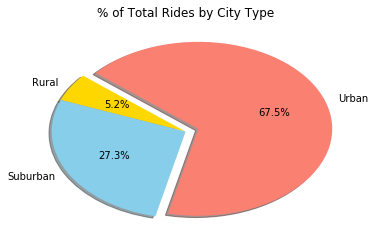

In [196]:
#create pie chart
ride_labels = total_rides_by_city_type['type']


total_rides = total_rides_by_city_type['nbr_rides']

#explode urban out
explode = (0, 0, 0.1)

# title
plt.title('% of Total Rides by City Type')

#chart
plt.pie(total_rides, explode=explode, labels=ride_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

# Third Pie Chart

% of Total Drivers by City Type

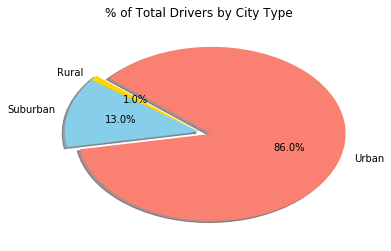

In [197]:

# Same as the first two but this time use driver_count 
total_drivers = total_fares_drivers_by_city_type['driver_count']

#explode urban out
explode = (0, 0, 0.1)

#title
plt.title('% of Total Drivers by City Type')

#chart
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()